In [4]:
import os
import pickle
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [4]:
os.listdir('data')

['dantri', 'laodong', 'nhandan', 'thanhnien', 'vietnamnet', 'vnexpress', 'vov']

In [6]:
for folder in os.listdir('data'):
    path_folder = os.path.join('data', folder)
    print(folder, ":" , os.listdir(path_folder))

dantri : ['bat-dong-san (2).txt', 'giai-tri (2).txt', 'giao-duc-khuyen-hoc (2).txt', 'kinh-doanh (2).txt', 'nhip-song-tre (2).txt', 'o-to-xe-may (2).txt', 'phap-luat (2).txt', 'su-kien (2).txt', 'suc-khoe (2).txt', 'suc-manh-so (2).txt', 'tam-long-nhan-ai (2).txt', 'the-gioi (2).txt', 'the-thao (2).txt', 'tinh-yeu-gioi-tinh (2).txt', 'van-hoa (2).txt', 'xa-hoi (2).txt']
laodong : ['ban-doc (2).txt', 'bat-dong-san (2).txt', 'cong-doan (2).txt', 'kinh-te (2).txt', 'phap-luat (2).txt', 'suc-khoe (2).txt', 'the-gioi (2).txt', 'the-thao (2).txt', 'thoi-su (2).txt', 'van-hoa-giai-tri (2).txt', 'xa-hoi (2).txt', 'xe (2).txt']
nhandan : ['bandoc (2).txt', 'chinhtri (2).txt', 'du-lich (2).txt', 'giaoduc (2).txt', 'khoahoc-congnghe (2).txt', 'kinhte (2).txt', 'phapluat (2).txt', 'thegioi (2).txt', 'thethao (2).txt', 'vanhoa (2).txt', 'xahoi (2).txt']
thanhnien : ['cong-nghe.txt', 'doi-song.txt', 'du-lich.txt', 'giao-duc.txt', 'gioi-tre.txt', 'suc-khoe.txt', 'tai-chinh-kinh-doanh.txt', 'the-gioi.

In [25]:
# clean file name and get all unique topic names
def cleanFileName():
    topic = []
    for folder in os.listdir('data'):
        path_folder = os.path.join('data', folder)
        list_files = os.listdir(path_folder)
        # clean file name
        for file in list_files:
            # clean (2) and space
            old_name = os.path.join(path_folder, file)
            new_name = old_name.replace("(2)", "").replace(" ", "")
            topic.append(file.replace("(2)", "").replace(" ", "").replace(".txt", ""))
            os.rename(old_name, new_name)
        print(folder, ":" , os.listdir(path_folder))
    print(set(topic))

In [26]:
cleanFileName()

dantri : ['bat-dong-san.txt', 'giai-tri.txt', 'giao-duc-khuyen-hoc.txt', 'kinh-doanh.txt', 'nhip-song-tre.txt', 'o-to-xe-may.txt', 'phap-luat.txt', 'su-kien.txt', 'suc-khoe.txt', 'suc-manh-so.txt', 'tam-long-nhan-ai.txt', 'the-gioi.txt', 'the-thao.txt', 'tinh-yeu-gioi-tinh.txt', 'van-hoa.txt', 'xa-hoi.txt']
laodong : ['ban-doc.txt', 'bat-dong-san.txt', 'cong-doan.txt', 'kinh-te.txt', 'phap-luat.txt', 'suc-khoe.txt', 'the-gioi.txt', 'the-thao.txt', 'thoi-su.txt', 'van-hoa-giai-tri.txt', 'xa-hoi.txt', 'xe.txt']
nhandan : ['ban-doc.txt', 'chinh-tri.txt', 'du-lich.txt', 'giao-duc.txt', 'khoa-hoc-cong-nghe.txt', 'kinh-te.txt', 'phap-luat.txt', 'the-gioi.txt', 'the-thao.txt', 'van-hoa.txt', 'xa-hoi.txt']
thanhnien : ['cong-nghe.txt', 'doi-song.txt', 'du-lich.txt', 'giao-duc.txt', 'gioi-tre.txt', 'suc-khoe.txt', 'tai-chinh-kinh-doanh.txt', 'the-gioi.txt', 'van-hoa.txt']
vietnamnet : ['ban-doc.txt', 'bat-dong-san.txt', 'cong-nghe.txt', 'doi-song.txt', 'giai-tri.txt', 'giao-duc.txt', 'kinh-doan

In [29]:
# unique topics in data (remove duplicated)
topics = ['gioi-tre', 'o-to-xe-may', 'phap-luat', 'tam-long-nhan-ai', 'van-hoa', 'giao-duc-khuyen-hoc', 'ban-doc', 'talkshow', 
          'y-kien', 'xa-hoi', 'suc-manh-so', 'tam-su', 'tuan-viet-nam', 'kinh-doanh', 'van-hoa-giai-tri', 'thoi-su', 'su-kien', 
          'xe', 'giao-duc', 'bat-dong-san', 'the-gioi', 'suc-khoe', 'kinh-te', 'du-lich', 'thoi-su-chinh-tri', 'tinh-yeu-gioi-tinh', 
          'cuoi', 'tai-chinh-kinh-doanh', 'quan-su-quoc-phong', 'khoa-hoc-cong-nghe', 'doi-song', 'cong-nghe', 'giai-tri', 
          'chinh-tri', 'the-thao', 'cong-doan', 'nhip-song-tre', 'khoa-hoc']

print(len(topics))

38


Maybe the definition of each topic according to newspaper circulation are different -> noise in data

In [7]:
# Merge txt file
def mergeFile():
    for folder in os.listdir('data'):
        path_folder = os.path.join('data', folder)
        list_files = os.listdir(path_folder)
        for file in list_files:
            path_file = os.path.join(path_folder, file)
            # Merge duplicated topic txt file to one 
            raw_file = open(path_file, "r", encoding="utf-8", errors='ignore')
            merge_file = open("data//all//" + file, "a", encoding="utf-8")
            merge_file.write(raw_file.read())
            # Close text file
            raw_file.close()
            merge_file.close()

In [9]:
mergeFile()
print(len(os.listdir('data//all')))

38


In [14]:
def divideDocument(file_path):
    with open(file_path, "r", encoding="utf-8", errors='ignore') as file:
        # ignore space at start and end of file
        data = file.read().strip().lstrip()
        documents = data.split("\n\n\n")
        # print(len(documents))
        num_documents = len(documents)
        file.close()
    return documents, num_documents

In [15]:
# check the function
divideDocument("data//all//kinh-doanh.txt")

(['40.000 tấn thịt lợn nhập về Việt Nam, từ 1/4 phải giảm về 70 ngàn đồng/kg\nTừ đầu năm đến nay Việt Nam đã nhập khẩu gần 40.000 tấn thịt lợn và sản phẩm thịt lợn các loại. Bên cạnh đó, đàn lợn trong nước cũng đang tăng mạnh nên ngày 1/4 các doanh nghiệp phải giảm giá lợn hơi xuống còn 70.000 đồng/kg.Thịt lợn nhập khẩu tăng trên 300%Theo báo cáo của Cơ quan kiểm dịch động vật cửa khẩu thuộc Cục Thú y (Bộ NNPTNT), năm 2019, Việt Nam nhập khẩu hơn 67.000 tấn thịt lợn và sản phẩm thịt lợn, tăng 63% so với năm 2018. Trong đó, mặt hàng này được nhập khẩu chủ yếu từ các nước như Đức, Ba Lan, Brazil, Canada, Hoa Kỳ.Đáng chú ý, từ đầu năm 2020 đến ngày 27/3, hơn 39.191 tấn thịt lợn được nhập về, tăng mạnh tới 312% so với năm 2019. Theo đó, thịt nhập khẩu từ Canada, Đức, Ba Lan, Brazil, Hoa Kỳ vẫn là chủ yếu, lượng thịt nhập khẩu từ Nga chỉ chiếm 2,62%.Ghi nhận trên thị trường, sau khi nhập về Việt Nam, thịt lợn nhập khẩu đã được phân phối và bán lẻ với mức giá rẻ hơn thịt lợn trong nước khoản

In [17]:
# Merge and label the data
def convertData():
    data = []
    label = []
    path_folder = 'data//all'
    for file in os.listdir(path_folder):
        file_path = os.path.join(path_folder, file)
        topic_data, len_topic_data = divideDocument(file_path)
        topic = file[:-4]
        # Append data and label
        data += topic_data
        label += len_topic_data*[topic]
        # Check
        print(topic, ":", len_topic_data)
    # Double check
    print("Length of data: ", len(data))
    print("Length of label: ", len(label))
    # Save raw data to pickle file 
    pickle.dump(data, open('data//data.pkl', 'wb'))
    pickle.dump(label, open('data//label.pkl', 'wb'))

In [18]:
convertData()

ban-doc : 7544
bat-dong-san : 5079
chinh-tri : 35621
cong-doan : 4533
cong-nghe : 5414
cuoi : 19316
doi-song : 39615
du-lich : 31668
giai-tri : 106278
giao-duc-khuyen-hoc : 1000
giao-duc : 49272
gioi-tre : 1582
khoa-hoc-cong-nghe : 6948
khoa-hoc : 46193
kinh-doanh : 39903
kinh-te : 13713
nhip-song-tre : 1000
o-to-xe-may : 47338
phap-luat : 86740
quan-su-quoc-phong : 12665
su-kien : 1000
suc-khoe : 35853
suc-manh-so : 1000
tai-chinh-kinh-doanh : 1593
talkshow : 65
tam-long-nhan-ai : 1000
tam-su : 31548
the-gioi : 149261
the-thao : 79925
thoi-su-chinh-tri : 3640
thoi-su : 122648
tinh-yeu-gioi-tinh : 1000
tuan-viet-nam : 562
van-hoa-giai-tri : 5786
van-hoa : 9567
xa-hoi : 27000
xe : 2349
y-kien : 9394
Length of data:  1044613
Length of label:  1044613


    Will remove some topic that have litte samples

## Preprocessing

In [1]:
import gensim

In [10]:
def divideChunk(num_chunk):
    data = pickle.load(open('data//data.pkl', 'rb'))
    len_data = len(data)
    len_chunk = len_data//num_chunk
    
    for chunk in range(num_chunk):
        # Compute start and end index for each chunk
        start = chunk*len_chunk
        if chunk < num_chunk - 1:
            end = (chunk + 1 )*len_chunk
            chunk_data = data[start:end]
        else:
            chunk_data = data[start:]
        # Save to separate files
        print("Chunk_num : {}".format(chunk), len(chunk_data))
        pickle.dump(chunk_data, open('data//data_{}.pkl'.format(chunk), 'wb'))

In [42]:
# Simple preprocessing: remove special characters, numbers, ...
def removeSpecialChar(num_chunk):
    for chunk in range(num_chunk):
        # Read each file
        data = pickle.load(open('data//data_{}.pkl'.format(chunk), 'rb'))
        # Process the data
        data_process = []
        for text in data:
            # gensim return list tokens
            text = gensim.utils.simple_preprocess(text)
            text = ' '.join(text)
            data_process.append(text)
        # Save processed file 
        file_name = 'data//data_x//data_{}.pkl'.format(chunk)    
        print("Chunk_num : {}".format(chunk), len(data_process))
        # dumps and dump are different
        pickle.dump(data_process, open(file_name, 'wb'))
        
    ## need divide the data to chunks for faster processing with gensim cuz file too large ~ 2.46Gb

In [14]:
divideChunk(10)

Chunk_num : 0 104461
Chunk_num : 1 104461
Chunk_num : 2 104461
Chunk_num : 3 104461
Chunk_num : 4 104461
Chunk_num : 5 104461
Chunk_num : 6 104461
Chunk_num : 7 104461
Chunk_num : 8 104461
Chunk_num : 9 104464


In [43]:
removeSpecialChar(10)

Chunk_num : 0 104461
Chunk_num : 1 104461
Chunk_num : 2 104461
Chunk_num : 3 104461
Chunk_num : 4 104461
Chunk_num : 5 104461
Chunk_num : 6 104461
Chunk_num : 7 104461
Chunk_num : 8 104461
Chunk_num : 9 104464


In [47]:
def mergeChunks(num_chunk):
    data = []
    for chunk in range(num_chunk):
        chunk_data = pickle.load(open('data//data_x//data_{}.pkl'.format(chunk), 'rb'))
        data += chunk_data
    print(len(data))
    pickle.dump(data, open("data//data_x//data_processed.pkl", "wb"))

In [48]:
mergeChunks(10)

1044613


    data_x: raw data, remove numbers, special character

## Data Exploration

In [144]:
# Visualize the data using tSNE 

In [6]:
data = pickle.load(open("data//data_x//data_processed.pkl", "rb"))
label = pickle.load(open("data//data_x//label.pkl", "rb"))

In [37]:
def createAndSaveTfidfdata(data, ngram_range, max_features):
    tfidf_vect = TfidfVectorizer(lowercase=False, analyzer='word', ngram_range=ngram_range, max_features=max_features)
    tfidf_data = tfidf_vect.fit_transform(data)
    # Save sparse matrix
    sp.save_npz('data//clean_data//tfidf_data_{}_{}.npz'.format(ngram_range, max_features), tfidf_data)
    # Save vectorizer for later build pipeline
    pickle.dump(tfidf_vect, open("data//vectorizer//tfidf_{}_{}".format(ngram_range, max_features), "wb"))

In [8]:
# choose ngram = (1, 1) ; max_features = 10000
tfidf_vect = TfidfVectorizer(lowercase=False, analyzer='word', ngram_range=(1, 1), max_features=10000)

In [9]:
tfidf_data = tfidf_vect.fit_transform(data)

In [10]:
tfidf_data

<1044613x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 188297689 stored elements in Compressed Sparse Row format>

In [105]:
sp.save_npz('data//tfidf_data_unigram.npz', tfidf_data)

    - save the tranformed tfidf data for faster loading next time 

Truncated SVD -> tSNE

In [ ]:
def visualizeTsne(data, label, n_components):
    # Apply truncated before using tSNE
    svd = TruncatedSVD(n_components, n_iter=7, random_state=42)
    data_svd = svd.fit_transform(data)
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_svd)
    # Plot tSNE
        # Mapping the color to label
    unique_label = list(set(label)) # convert to list 
    
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    for la in unique_label:
        indices = [i for i, x in enumerate(sub_label) if x == la]
        plt.scatter(tsne_results[:, 0][indices], tsne_results[:, 1][indices], label=la)
    plt.legend()
    plt.show()

In [35]:
rndints = np.random.randint(low=1, high=1044613, size=4000)
sub_label = []
for i in rndints:
    sub_label.append(label[i])
print(len(set(sub_label)))

37


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.005s...
[t-SNE] Computed neighbors for 4000 samples in 0.903s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.971802
[t-SNE] KL divergence after 300 iterations: 1.817626


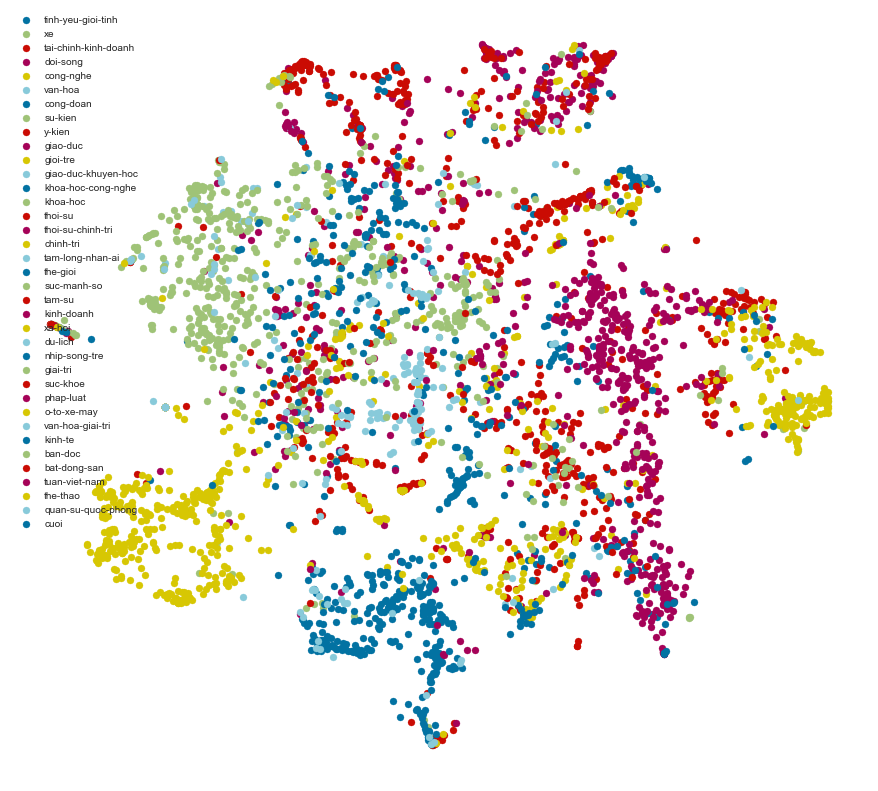

In [38]:
# Test the functions - unigram tfidf
visualizeTsne(tfidf_data[rndints], sub_label, 20)

In [95]:
def visualizeTsneFollowLabels(data, label, labels_choosed):
    # Find indices
    indices = []
    sub_label = []
    for ind, la in enumerate(labels_choosed):
        inds = [i for i, x in enumerate(label) if x == la]
        indices.append(inds)
        sub_label += len(inds)*[la]
    # print(indices) 
    sub_data = data[indices[0]]
    for la in range(1, len(labels_choosed)):
        sub_data = sp.vstack((sub_data, data[indices[la]]) , format='csr')
    # 
    # print(sub_data.shape[0])
    # print(len(sub_label))
    visualizeTsne(sub_data, sub_label, 20)

59555
59555


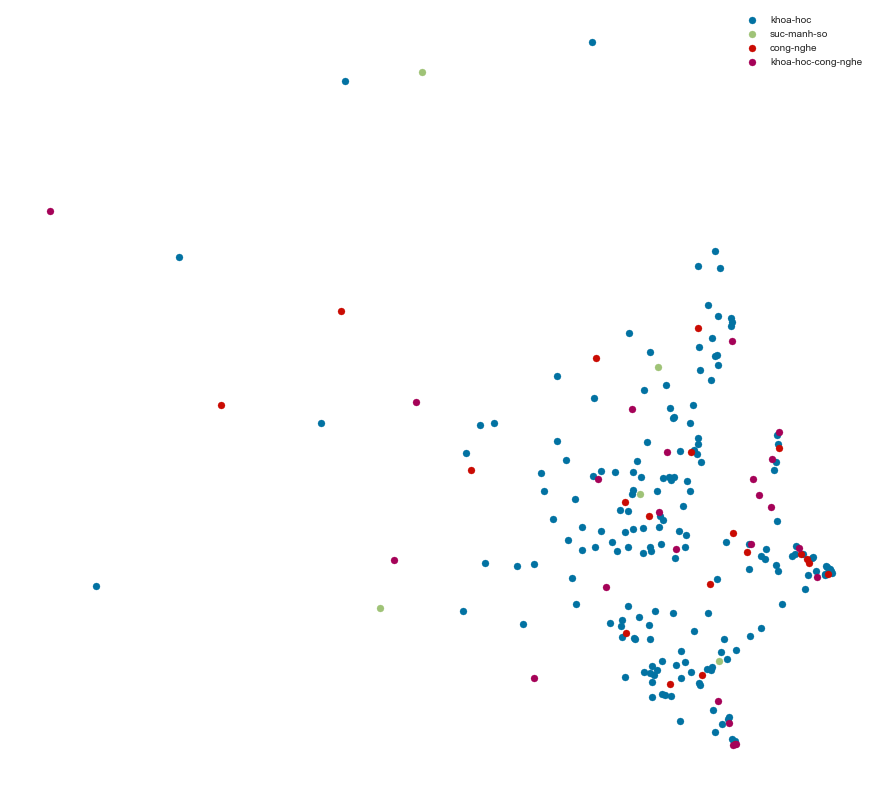

In [102]:
visualizeTsneFollowLabels(tfidf_data, label, ["cong-nghe", "khoa-hoc-cong-nghe", "khoa-hoc", "suc-manh-so"])

    Points not too far away -> can be a cluster

140947
140947


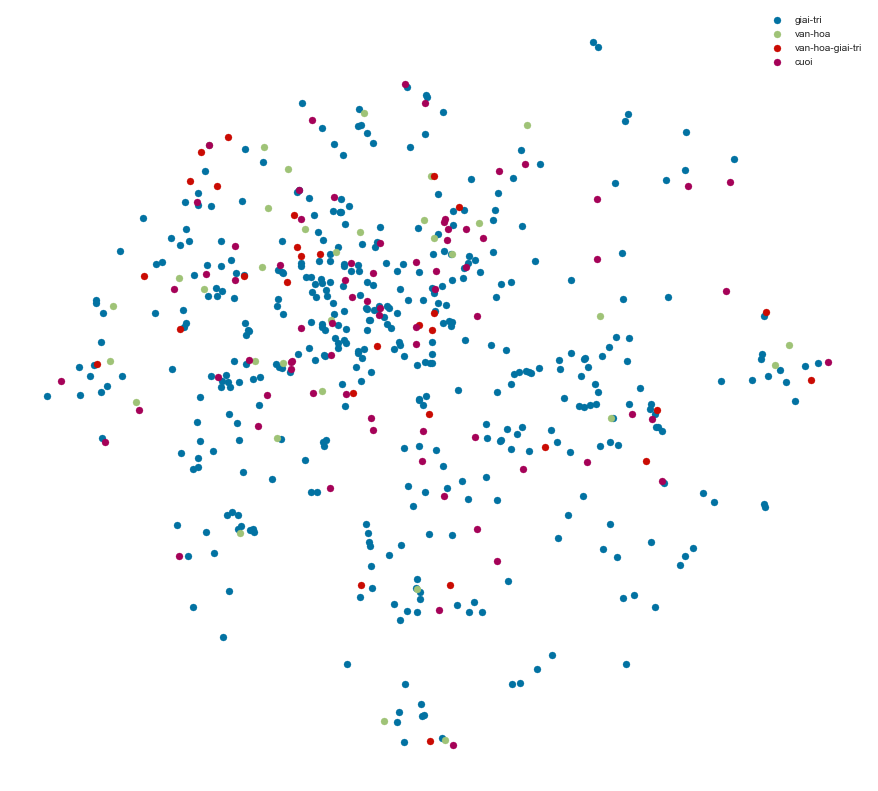

In [103]:
visualizeTsneFollowLabels(tfidf_data, label, ["giai-tri", "van-hoa-giai-tri", "van-hoa", "cuoi"])

55209
55209


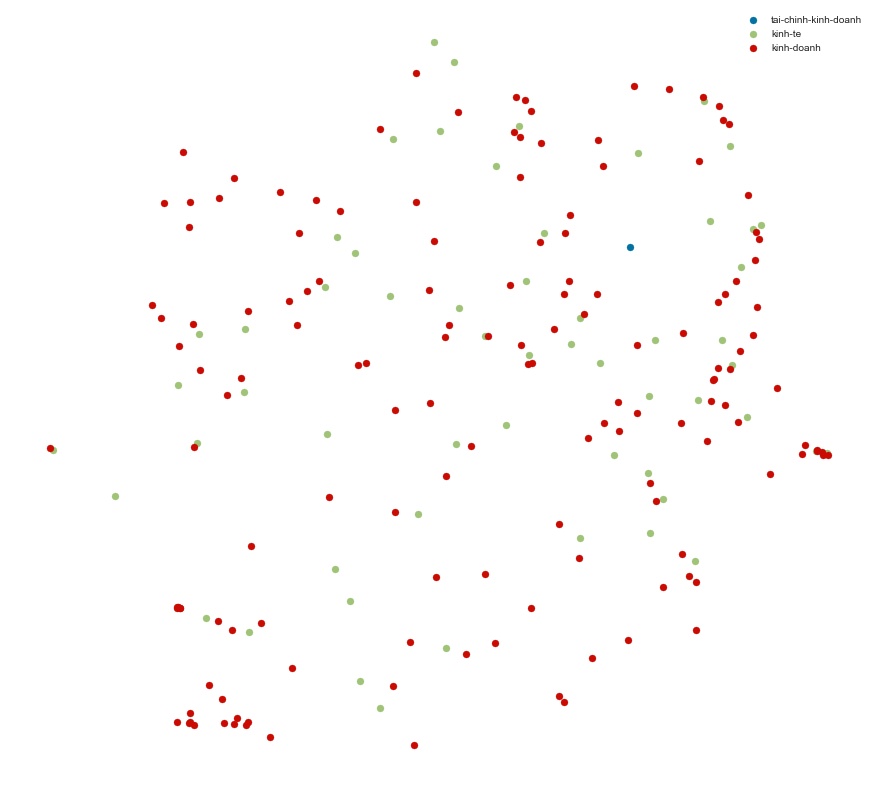

In [112]:
visualizeTsneFollowLabels(tfidf_data, label, ["tai-chinh-kinh-doanh", "kinh-te", "kinh-doanh"])

Choose some labels for classification based on crition belows:
- Avoid imbalance data.

- chinh-tri : 35621 | thoi-su-chinh-tri : 3640 | thoi-su : 122648
- cong-nghe : 5414 | khoa-hoc-cong-nghe : 6948 | khoa-hoc : 46193 | suc-manh-so : 1000
- doi-song : 39615
- du-lich : 31668
- giai-tri : 106278 | van-hoa-giai-tri : 5786 | van-hoa : 9567 | cuoi : 19316
- giao-duc-khuyen-hoc : 1000 | giao-duc : 49272
- kinh-doanh : 39903 | kinh-te : 13713 | tai-chinh-kinh-doanh : 1593
- o-to-xe-may : 47338 | xe : 2349
- phap-luat : 86740
- quan-su-quoc-phong : 12665
- suc-khoe : 35853
- the-gioi : 149261
- the-thao : 79925
- xa-hoi : 27000

In [117]:
# 14 classes
# Prepare data for next step 
group = [["thoi-su-chinh-tri", "chinh-tri", "thoi-su"], ["khoa-hoc-cong-nghe", "cong-nghe", "khoa-hoc", "suc-manh-so"],
         ["doi-song"], ["du-lich"], ["van-hoa-giai-tri", "giai-tri", "van-hoa", "cuoi"], 
         ["giao-duc-khuyen-hoc", "giao-duc"], ["tai-chinh-kinh-doanh", "kinh-te", "kinh-doanh"],
         ["o-to-xe-may", "xe"], ["phap-luat"], ["quan-su-quoc-phong"], ["suc-khoe"], ["the-gioi"], ["the-thao"], ["xa-hoi"]]

In [147]:
def createCleanData(data, labels):  
    data_14 = []
    label_14 = []
    for i in group:
        topic = i[0]
        for la in i:
            # samples are store in order so just need to find start index and end index
            start_index = labels.index(la)
            end_index = labels.count(la) + start_index
            # 
            sub_data = data[start_index:end_index]
            len_sub_data = len(sub_data)
            # print("topic: ", la)
            # print("start index : ", start_index, "end index :", end_index, "len samples :", len_sub_data)
            # data_14 += sub_data
            label_14 += len_sub_data*[topic]
    # print(len(data_14))
    print(len(label_14))
    # pickle.dump(data_14, open("data//clean_data//data_14.pkl", "wb"))
    pickle.dump(label_14, open("data//clean_data//label_14.pkl", "wb"))

In [148]:
createCleanData(data, label)

980306


In [30]:
data =pickle.load(open("data//clean_data//data_14.pkl", "rb"))
label = pickle.load(open("data//clean_data//label_14.pkl", "rb"))
print(set(label))
print(len(set(label)))

{'phap-luat', 'the-gioi', 'quan-su-quoc-phong', 'o-to-xe-may', 'khoa-hoc-cong-nghe', 'the-thao', 'van-hoa-giai-tri', 'doi-song', 'giao-duc-khuyen-hoc', 'du-lich', 'suc-khoe', 'thoi-su-chinh-tri', 'tai-chinh-kinh-doanh', 'xa-hoi'}
14


In [20]:
label = pickle.load(open("data//clean_data//label_14.pkl", "rb"))

In [34]:
def plotHistogram(label):
    unique_label = list(set(label))
    count_label = []
    for i in unique_label:
        count_label.append(label.count(i))
    print(unique_label)
    print(count_label)
    plt.figure(figsize=(10, 10))
    plt.barh(unique_label, count_label)
    plt.show()

['phap-luat', 'the-gioi', 'quan-su-quoc-phong', 'o-to-xe-may', 'khoa-hoc-cong-nghe', 'the-thao', 'van-hoa-giai-tri', 'doi-song', 'giao-duc-khuyen-hoc', 'du-lich', 'suc-khoe', 'thoi-su-chinh-tri', 'tai-chinh-kinh-doanh', 'xa-hoi']
[86740, 149261, 12665, 49687, 59555, 79925, 140947, 39615, 50272, 31668, 35853, 161909, 55209, 27000]


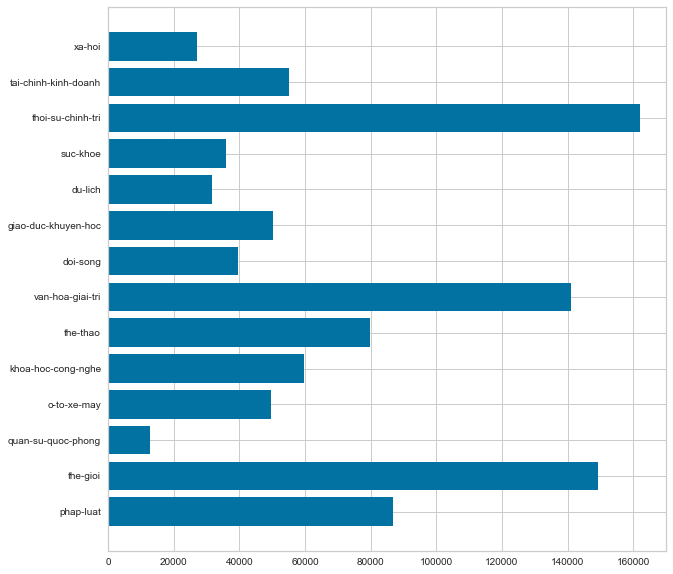

In [29]:
plotHistogram()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)   

['phap-luat', 'the-gioi', 'quan-su-quoc-phong', 'o-to-xe-may', 'khoa-hoc-cong-nghe', 'the-thao', 'van-hoa-giai-tri', 'giao-duc-khuyen-hoc', 'doi-song', 'du-lich', 'suc-khoe', 'thoi-su-chinh-tri', 'tai-chinh-kinh-doanh', 'xa-hoi']
[57992, 99889, 8442, 33299, 39808, 53603, 94366, 33753, 26432, 21248, 24116, 108647, 37101, 18109]


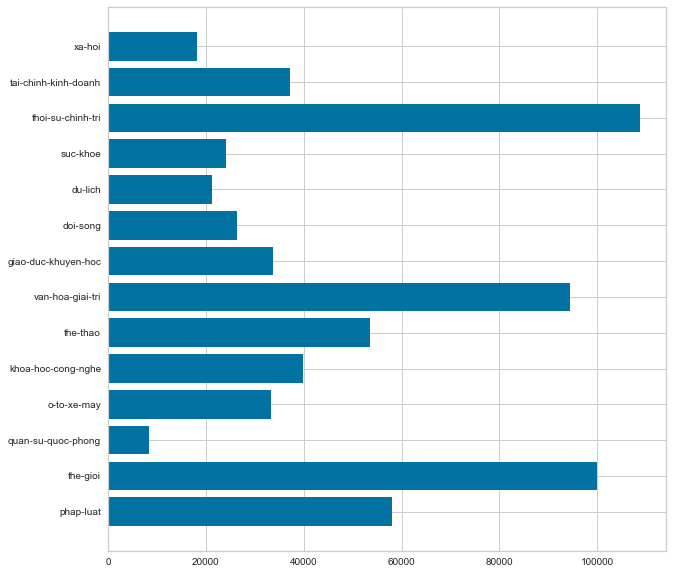

In [35]:
plotHistogram(y_train)

['phap-luat', 'the-gioi', 'quan-su-quoc-phong', 'o-to-xe-may', 'khoa-hoc-cong-nghe', 'the-thao', 'van-hoa-giai-tri', 'doi-song', 'giao-duc-khuyen-hoc', 'du-lich', 'suc-khoe', 'thoi-su-chinh-tri', 'tai-chinh-kinh-doanh', 'xa-hoi']
[28748, 49372, 4223, 16388, 19747, 26322, 46581, 13183, 16519, 10420, 11737, 53262, 18108, 8891]


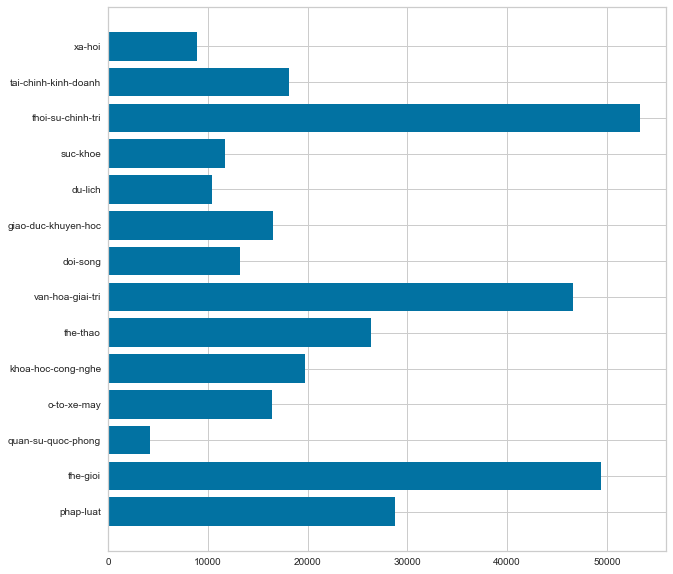

In [36]:
plotHistogram(y_test)

## Feature Extraction

In [38]:
list_ngram_values =[(1,1), (2,2), (3,3), (4,4), (1,5)]
for i in list_ngram_values:
    createAndSaveTfidfdata(data=X_train, ngram_range=i, max_features=30000)

KeyboardInterrupt: 

    Add verbose to createAndSaveTfidfdata function

## Feature Selection

    Apply chi2, IG, MI, OCFS

    Not using word segmentation because:
- Word segmentation can make the sentence have multiple meaning if this processing is not good.
- Make the n-gram feature dimension smaller and reduce the sparse data problem 
- Apply some feature selection later -> reduce noise

## Classification

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [ ]:
def trainModel(classifier, data, labels, train_data, train_labels, test_data, test_labels, stats_name, model_name):
    # split to training and validation data
    X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_labels, test_size=0.2, random_state=21)
    
    # train the model
    classifier.fit(X_train, y_train)
    
    # build the stats report
        # on the training data
    train_pred = classifier.predict(train_data)
    train_clf_rp = metrics.classification_report(train_labels, train_pred)
    train_cfs_rp = metrics.confusion_matrix(train_labels, train_pred, labels=classifier.classes_)
        # on the testing data
    test_pred = classifier.predict(test_data)
    test_clf_rp = metrics.classification_report(test_labels, test_pred)
    test_cfs_rp = metrics.confusion_matrix(test_labels, test_pred, labels=classifier.classes_)
        # on the whole data
    pred = classifier.predict(data)
    clf_rp = metrics.classification_report(labels, pred)
    cfs_rp = metrics.confusion_matrix(labels, pred, labels=classifier.classes_)
        # save the report 
    with open('report//%s.txt' %stats_name, 'w', encoding='utf-8') as report_file:
        report_file.write('Training data:\n')
        report_file.write(train_clf_rp)
        report_file.write(np.array2string(train_cfs_rp, separator = ','))
        
        report_file.write('\n\nTesting data:\n')
        report_file.write(test_clf_rp)
        report_file.write(np.array2string(test_cfs_rp, separator = ','))
        
        report_file.write('\n\nWhole data:\n')
        report_file.write(clf_rp)
        report_file.write(np.array2string(cfs_rp, separator = ','))
        
        report_file.close()
    # save the model 
    dump(classifier, 'models//%s.joblib' %model_name)
    # print the accuracy (for choosing model)
    print('Testing data accuracy: ', metrics.accuracy_score(test_pred, test_labels))

## References

- Text Classification Algorithms: A Survey.
- Sklearn documentation
- Addressing the problem of Unbalanced Data sets in Sentiment Analysis.
- A Comparative Study on Vietnamese Text Classification Methods.
- OCFS: optimal orthogonal centroid feature selection for text categorization.

- https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
- https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
- https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
- https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d